## Web Scraping NBA data (from espn and NBA(official_site))
### Team members ->  Himanish Prakash, Eduardo Saavedra, &  Shiv Goel

In [2]:
import requests
from pymongo import MongoClient
from  selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by  import By
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
import json
from pymongo import MongoClient

/Users/himanishprakash/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
driver = webdriver.Chrome()

driver.implicitly_wait(10)
driver.set_script_timeout(180)
driver.set_page_load_timeout(10)
driver.get('https://www.espn.com/')
time.sleep(5)

## open search button on the espn site
search = driver.find_element(By.CSS_SELECTOR, "a[aria-label='Open Search']")
search.click()
time.sleep(5)

## giving NBA as a input 
text_input = driver.find_element(By.CSS_SELECTOR, "input[aria-label='Search']")
text_input.send_keys('NBA \n')
# Click the element
time.sleep(5)

## Clicking on NBA button to open the NBA Stats page
nba = driver.find_element(By.CSS_SELECTOR, "a[data-track-searchresultselected='National Basketball Association']")
nba.click()
time.sleep(5)

## Clicking on the More dropdown  
more = driver.find_element(By.CSS_SELECTOR, 'li[class = "has-sub \"]')
more.click()
time.sleep(5)

## clicking on the NBA history, so that it can can direct us to NBA history stats data
nba_history = driver.find_element(By.LINK_TEXT, 'NBA History')
nba_history.click()
time.sleep(5)

## storing the page for leading points dataset
points=driver.page_source
## saving complete file as a html
with open('all_time_points_leader.html', 'w') as f:
    f.write(points)
  
##  Clicking on all time rebound leader
rebounds = driver.find_element(By.LINK_TEXT, 'Rebounds')
rebounds.click()
time.sleep(5)

## saving the rebound leaderboard page
rebound = driver.page_source
with open('all_time_rebound_leader.html', 'w') as f:
    f.write(rebound)
 
##  Clicking on all time assists leader    
Assists = driver.find_element(By.LINK_TEXT, 'Assists')
Assists.click()
time.sleep(5)
## saving the assists leaderboard page
Assists = driver.page_source
with open('all_time_assists_leader.html', 'w') as f:
    f.write(Assists)
  
 
##  Clicking on all time Steals leader      
Steals = driver.find_element(By.LINK_TEXT, 'Steals')
Steals.click()
time.sleep(5)

## saving the Steals leaderboard page
Steals = driver.page_source
with open('all_time_steals_leader.html', 'w') as f:
    f.write(Steals)

##  Clicking on all time Blocks leader     
Blocks = driver.find_element(By.LINK_TEXT, 'Blocks')
Blocks.click()
time.sleep(5)

## saving the Blocks leaderboard page
Blocks = driver.page_source
with open('all_time_Blocks_leader.html', 'w') as f:
    f.write(Blocks)

driver.quit()

TimeoutException: Message: timeout: Timed out receiving message from renderer: 10.000
  (Session info: chrome=122.0.6261.129)
Stacktrace:
0   chromedriver                        0x000000010109c524 chromedriver + 3966244
1   chromedriver                        0x0000000101094ab0 chromedriver + 3934896
2   chromedriver                        0x0000000100d17da0 chromedriver + 277920
3   chromedriver                        0x0000000100d014f4 chromedriver + 185588
4   chromedriver                        0x0000000100d01390 chromedriver + 185232
5   chromedriver                        0x0000000100cffcf4 chromedriver + 179444
6   chromedriver                        0x0000000100d0082c chromedriver + 182316
7   chromedriver                        0x0000000100d0ef84 chromedriver + 241540
8   chromedriver                        0x0000000100d220bc chromedriver + 319676
9   chromedriver                        0x0000000100d00dbc chromedriver + 183740
10  chromedriver                        0x0000000100d21e74 chromedriver + 319092
11  chromedriver                        0x0000000100d92ddc chromedriver + 781788
12  chromedriver                        0x0000000100d4efb0 chromedriver + 503728
13  chromedriver                        0x0000000100d4fa28 chromedriver + 506408
14  chromedriver                        0x000000010106170c chromedriver + 3725068
15  chromedriver                        0x0000000101065c00 chromedriver + 3742720
16  chromedriver                        0x000000010104a1f4 chromedriver + 3629556
17  chromedriver                        0x00000001010666fc chromedriver + 3745532
18  chromedriver                        0x000000010103d56c chromedriver + 3577196
19  chromedriver                        0x0000000101084f5c chromedriver + 3870556
20  chromedriver                        0x0000000101085100 chromedriver + 3870976
21  chromedriver                        0x0000000101094720 chromedriver + 3933984
22  libsystem_pthread.dylib             0x000000019038af94 _pthread_start + 136
23  libsystem_pthread.dylib             0x0000000190385d34 thread_start + 8


In [7]:
def pandas_dataframe(html_file):
    '''This function reads the html file and then parse through beautiful soup so that we could extract the table from the html data. 
    Then store the extracted data in the form of list. Converting that list to dataframe, so that can be easily stored in the any database.'''
    with open(html_file, "r") as file:
        html_content = file.read()
        
    soup = BeautifulSoup(html_content,'html.parser')

    rows = soup.find_all('tr')

    extracted_data_points = [] 
    for row in rows:
        
        cols = row.find_all(['td','th'])
        cols_text = [col.get_text() for col in cols]
        
        ## check whether the column is null or not and checking any text is present in the columns and adding it to the extracted rows
        if cols_text and any(text for text in cols_text):
            extracted_data_points.append(cols_text)
            

    extracted_data_points[:5]
    ## storing the list as dataframe      
    points_df = pd.DataFrame(extracted_data_points[2:],columns=extracted_data_points[1])
    ## renaming the columns
    points_df = points_df.rename(columns = {'RK':'Rank','PLAYER':'players'})
    
    return points_df
        

In [8]:
points_df  = pandas_dataframe('all_time_points_leader.html')
rebound_df = pandas_dataframe('all_time_rebound_leader.html')
assists_df = pandas_dataframe('all_time_assists_leader.html')
steals_df = pandas_dataframe('all_time_steals_leader.html')
blocks_df = pandas_dataframe('all_time_Blocks_leader.html')

In [9]:
points_df.head()

,Rank,players,PTS
0,1,LeBRON JAMES,"40,179"
1,2,Kareem Abdul-Jabbar,"38,387"
2,3,Karl Malone,"36,928"
3,4,Kobe Bryant,"33,643"
4,5,Michael Jordan,"32,292"


In [ ]:
rebound_df.head()


,Rank,players,REB
0,1,Wilt Chamberlain,"23,924"
1,2,Bill Russell,"21,620"
2,3,Kareem Abdul-Jabbar,"17,440"
3,4,Elvin Hayes,"16,279"
4,5,Moses Malone,"16,212"


In [ ]:

assists_df.head()

,Rank,players,AST
0,1,John Stockton,"15,806"
1,2,Jason Kidd,"12,091"
2,3,CHRIS PAUL,"11,798"
3,4,LeBRON JAMES,"10,905"
4,5,Steve Nash,"10,335"


In [ ]:

steals_df.head()

,Rank,players,STL
0,1,John Stockton,"3,265"
1,2,Jason Kidd,"2,684"
2,3,CHRIS PAUL,"2,598"
3,4,Michael Jordan,"2,514"
4,5,Gary Payton,"2,445"


In [ ]:
blocks_df = pandas_dataframe('all_time_Blocks_leader.html')
blocks_df.head()

,Rank,players,BLK
0,1,Hakeem Olajuwon,"3,830"
1,2,Dikembe Mutombo,"3,289"
2,3,Kareem Abdul-Jabbar,"3,189"
3,4,Mark Eaton,"3,064"
4,5,Tim Duncan,"3,020"


In [ ]:
def store_dataframe_mongodb(df, db_name, collection_name, host='localhost', port=27017):
    ''' In this function, we are giving the dataframe, database name and collection as a input. 
        We are converting the dataframe to dictionary so that we can input the each row in mongodb. 
    '''
    # Connect to the MongoDB client
    client = MongoClient(host, port)
    ## database name 
    db = client[db_name]
    ## collection name
    collection = db[collection_name]
    ## converting the dataframe to dictionary 
    records = df.to_dict('records')
    ## inserting the rows to the collection
    collection.insert_many(records)
    client.close()




In [ ]:
## calling the function to inputing each dataframe  to each of there collections
store_dataframe_mongodb(points_df, 'NBA', 'all__time_points_leaderboard')
store_dataframe_mongodb(rebound_df, 'NBA', 'all__time_rebound_leaderboard')
store_dataframe_mongodb(assists_df, 'NBA', 'all__time_assists_leaderboard')
store_dataframe_mongodb(steals_df, 'NBA', 'all__time_steals_leaderboard')
store_dataframe_mongodb(blocks_df, 'NBA', 'all__time_blocks_leaderboard')

### Each season top 50 player Records

In [12]:
## url to fetch the data which is stored on the site in the json format
urls = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2022-23&SeasonType=Regular%20Season&StatCategory=PTS'

In [13]:
## sending the request to fetch the data
nba_season = requests.get(urls)
## Storing the data in json format 
nba_season = nba_season.json()

In [14]:
## creating the list of years from 1951 to 2024
years_list = [f"{year}-{str(year + 1)[2:]}" for year in range(1951, 2024)]
per_mode = ['Totals', 'PerGame']
season_type = ['Playoffs','Regular%20Season']

In NBA site, it stated that data is available start from 1946 but we go on the site we could see that no data is available till 1950. 

Running the below code will Take 1 hr, so please don't run this

In [15]:
def nba_season_data(urls):
    nba_season = requests.get(urls)
    ## Storing the data in json format 
    nba_season = nba_season.json()
    
    ## creating the list of years from 1951 to 2024
    years_list = [f"{year}-{str(year + 1)[2:]}" for year in range(1951, 2024)]
    per_mode = ['Totals', 'PerGame']
    season_type = ['Playoffs','Regular%20Season']
    
    all_data = pd.DataFrame()
    for i in years_list:
        for j in season_type:
            for k in per_mode:
                base_url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode={}&Scope=S&Season={}&SeasonType={}&StatCategory=PTS'
                result = requests.get(base_url.format(k,i,j))
                nba_season = result.json()
                column_names = nba_season['resultSet']['headers']
                row_values = nba_season['resultSet']['rowSet']
                player_data_year =  pd.DataFrame(row_values,columns=column_names )
                player_data_year['year'] = i
                player_data_year['SeasonType'] = j
                player_data_year['per_mode'] = k
                all_data = pd.concat([all_data,player_data_year])
                
                print(i,j,k, len(row_values))
                
                time.sleep(7)
    all_data['SeasonType'] =all_data['SeasonType'].replace('Regular%20Season','Regular Season')

    return all_data
    
    
    
        

In [16]:
final_data = nba_season_data(urls)

1951-52 Playoffs Totals 73
1951-52 Playoffs PerGame 66
1951-52 Regular%20Season Totals 115
1951-52 Regular%20Season PerGame 79
1952-53 Playoffs Totals 78
1952-53 Playoffs PerGame 67
1952-53 Regular%20Season Totals 123
1952-53 Regular%20Season PerGame 76
1953-54 Playoffs Totals 56
1953-54 Playoffs PerGame 49
1953-54 Regular%20Season Totals 110
1953-54 Regular%20Season PerGame 74
1954-55 Playoffs Totals 60
1954-55 Playoffs PerGame 55
1954-55 Regular%20Season Totals 100
1954-55 Regular%20Season PerGame 65
1955-56 Playoffs Totals 60
1955-56 Playoffs PerGame 54
1955-56 Regular%20Season Totals 92
1955-56 Regular%20Season PerGame 68
1956-57 Playoffs Totals 59
1956-57 Playoffs PerGame 54
1956-57 Regular%20Season Totals 97
1956-57 Regular%20Season PerGame 65
1957-58 Playoffs Totals 60
1957-58 Playoffs PerGame 53
1957-58 Regular%20Season Totals 99
1957-58 Regular%20Season PerGame 63
1958-59 Playoffs Totals 60
1958-59 Playoffs PerGame 52
1958-59 Regular%20Season Totals 92
1958-59 Regular%20Season

/var/folders/q8/ljm60kbj15sdr2ljq0vcfbq00000gn/T/ipykernel_68895/370715207.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data,player_data_year])


1977-78 Playoffs Totals 117
1977-78 Playoffs PerGame 97
1977-78 Regular%20Season Totals 244
1977-78 Regular%20Season PerGame 148
1978-79 Playoffs Totals 118
1978-79 Playoffs PerGame 100
1978-79 Regular%20Season Totals 251
1978-79 Regular%20Season PerGame 158


/var/folders/q8/ljm60kbj15sdr2ljq0vcfbq00000gn/T/ipykernel_68895/370715207.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data,player_data_year])


1979-80 Playoffs Totals 115
1979-80 Playoffs PerGame 96
1979-80 Regular%20Season Totals 257
1979-80 Regular%20Season PerGame 152
1980-81 Playoffs Totals 126
1980-81 Playoffs PerGame 98
1980-81 Regular%20Season Totals 278
1980-81 Regular%20Season PerGame 162
1981-82 Playoffs Totals 129
1981-82 Playoffs PerGame 101
1981-82 Regular%20Season Totals 296
1981-82 Regular%20Season PerGame 170
1982-83 Playoffs Totals 140
1982-83 Playoffs PerGame 106
1982-83 Regular%20Season Totals 316
1982-83 Regular%20Season PerGame 176
1983-84 Playoffs Totals 183
1983-84 Playoffs PerGame 135
1983-84 Regular%20Season Totals 309
1983-84 Regular%20Season PerGame 180
1984-85 Playoffs Totals 180
1984-85 Playoffs PerGame 134
1984-85 Regular%20Season Totals 309
1984-85 Regular%20Season PerGame 169
1985-86 Playoffs Totals 180
1985-86 Playoffs PerGame 134
1985-86 Regular%20Season Totals 314
1985-86 Regular%20Season PerGame 175
1986-87 Playoffs Totals 184
1986-87 Playoffs PerGame 144
1986-87 Regular%20Season Totals 335

/var/folders/q8/ljm60kbj15sdr2ljq0vcfbq00000gn/T/ipykernel_68895/370715207.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data,player_data_year])


2017-18 Playoffs PerGame 0
2017-18 Regular%20Season Totals 540
2017-18 Regular%20Season PerGame 253
2018-19 Playoffs Totals 212
2018-19 Playoffs PerGame 155
2018-19 Regular%20Season Totals 530
2018-19 Regular%20Season PerGame 258
2019-20 Playoffs Totals 217
2019-20 Playoffs PerGame 147
2019-20 Regular%20Season Totals 529
2019-20 Regular%20Season PerGame 261
2020-21 Playoffs Totals 239
2020-21 Playoffs PerGame 147
2020-21 Regular%20Season Totals 540
2020-21 Regular%20Season PerGame 237
2021-22 Playoffs Totals 217
2021-22 Playoffs PerGame 148
2021-22 Regular%20Season Totals 605
2021-22 Regular%20Season PerGame 228
2022-23 Playoffs Totals 217
2022-23 Playoffs PerGame 144
2022-23 Regular%20Season Totals 539
2022-23 Regular%20Season PerGame 245


/var/folders/q8/ljm60kbj15sdr2ljq0vcfbq00000gn/T/ipykernel_68895/370715207.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data,player_data_year])


2023-24 Playoffs Totals 0


/var/folders/q8/ljm60kbj15sdr2ljq0vcfbq00000gn/T/ipykernel_68895/370715207.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data,player_data_year])


2023-24 Playoffs PerGame 0
2023-24 Regular%20Season Totals 557
2023-24 Regular%20Season PerGame 248


In [10]:
final_data

NameError: name 'final_data' is not defined

In [ ]:
final_data = final_data.to_csv('all_Season.csv')

In [ ]:
## storing all the nba season data to mongodb
store_dataframe_mongodb(final_data, 'NBA', 'all_season_record')

In [ ]:
final_data["PLAYER" = ]

### NBA Database image with all the collection

![Screenshot 2024-03-19 at 2.56.32 AM.png](<attachment:Screenshot 2024-03-19 at 2.56.32 AM.png>)
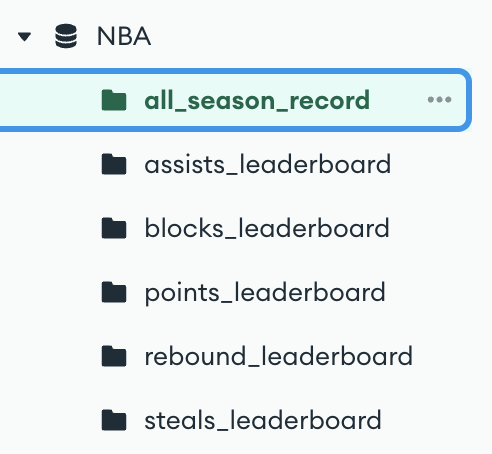

### Image of the data stored in the assist collection(Fetched using selenium)

![Screenshot 2024-03-19 at 2.56.39 AM.png](<attachment:Screenshot 2024-03-19 at 2.56.39 AM.png>)
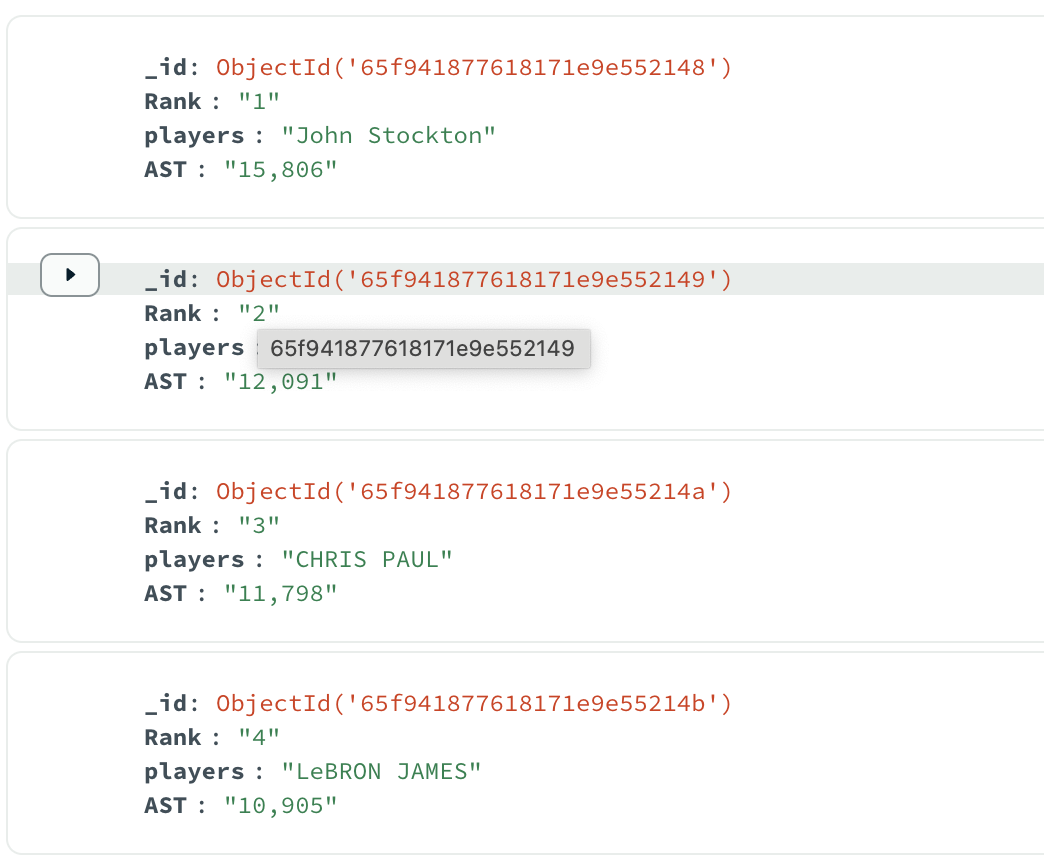

### Image of the data stored in the all season record collection

![Screenshot 2024-03-19 at 2.56.48 AM.png](<attachment:Screenshot 2024-03-19 at 2.56.48 AM.png>)
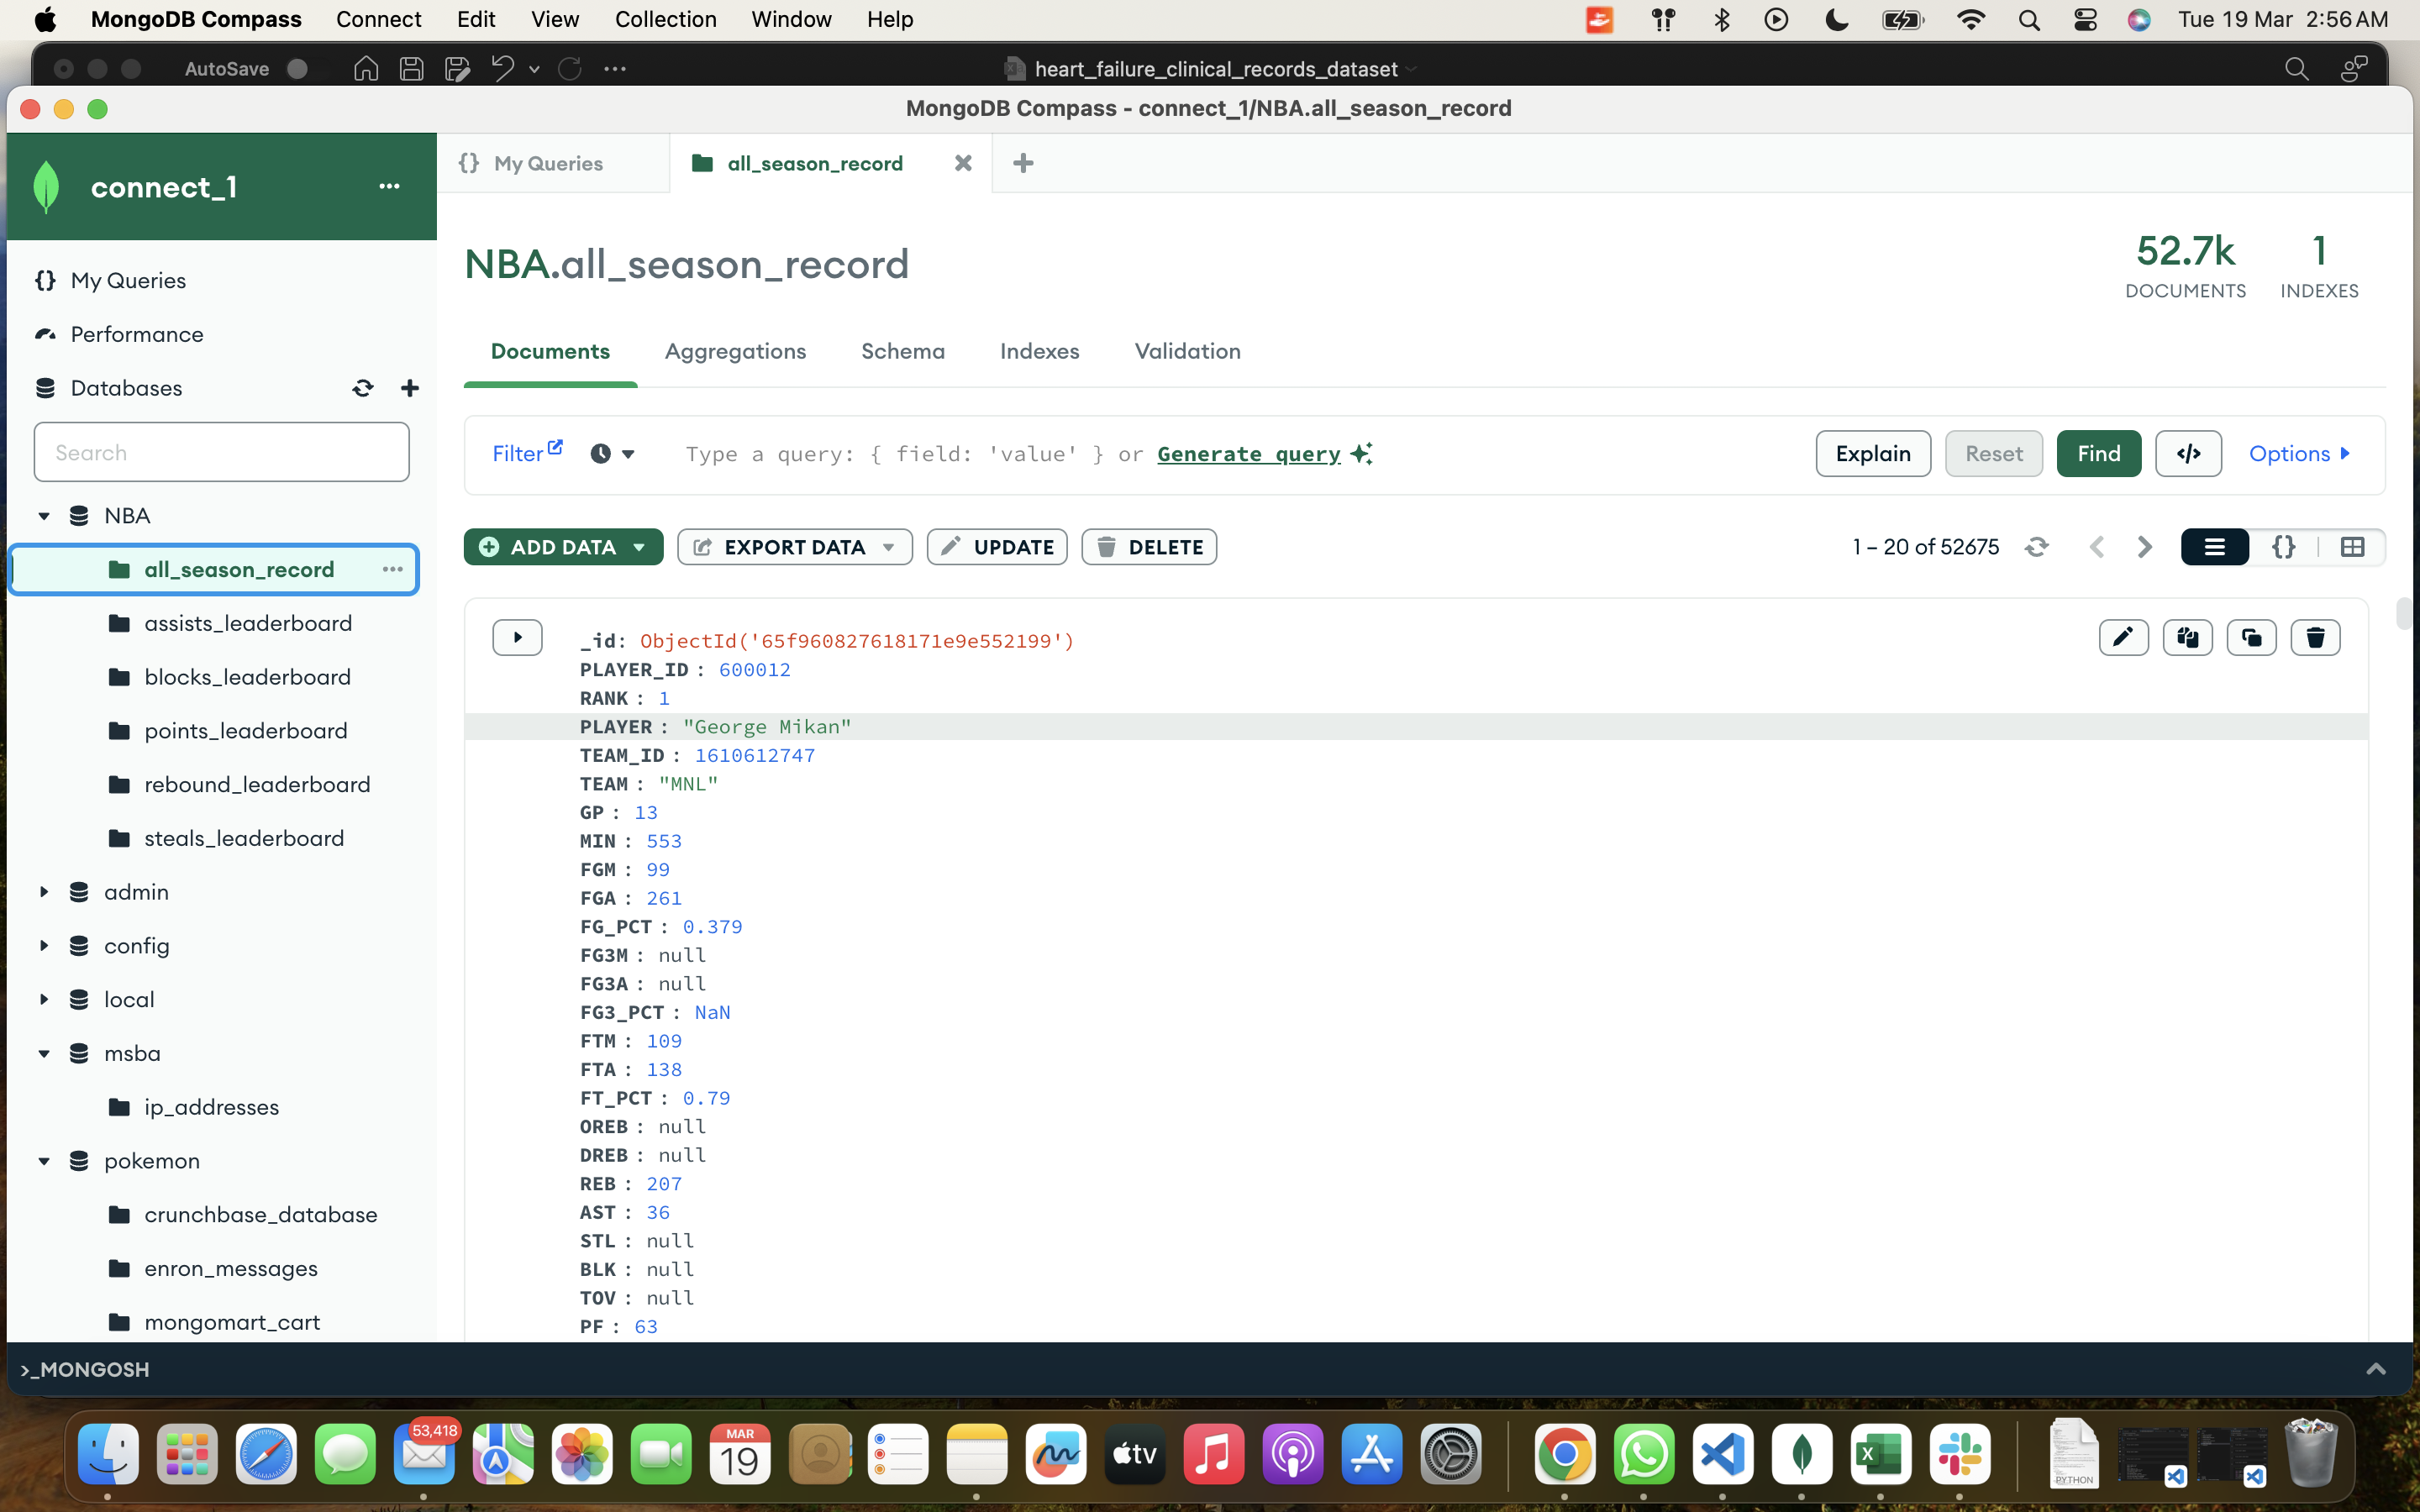